In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
icemodel_dat = np.genfromtxt("./icemodel.dat", delimiter=" ", dtype=float)
icemodel_par = np.genfromtxt("./icemodel.par", dtype=float)

In [57]:
#For the structure of the icemodel.dat and icemodel.par files please refer to 
#https://docs.icecube.aq/icetray/main/projects/ppc/index.html under section icemodel.dat and icemodel.par
#For the calculation of the absorption and scattering length from the icemodel files please refer to the SPICE paper
#https://user-web.icecube.wisc.edu/~dima/work/WISC/ppc/spice/new/paper/a.pdf

lamb = 400 # We work with 400 nm light

depth, be_400, adust_400, delta_tau, _, _, _ = icemodel_dat.T

alpha, kappa, A, B = icemodel_par.T[0]
u_alpha, u_kappa, u_A, u_B = icemodel_par.T[1]

abs_length = adust_400 + A*np.exp(-B/lamb) * (1+0.01*delta_tau)

In [58]:
#In Chris Lozanos master thesis he derives a relation between the mDOM effective volume and the inverse of the 
#absorption length. He simulates several depth and fits a linear function with slope m to the data. He finds 
#m = 15.2±0.4

m = 15.2
u_m = 0.4
E = 25 #simulated for 25 MeV positrons

effvol_positron = m*1/abs_length
effvol_photon = effvol_positron/(E*178)

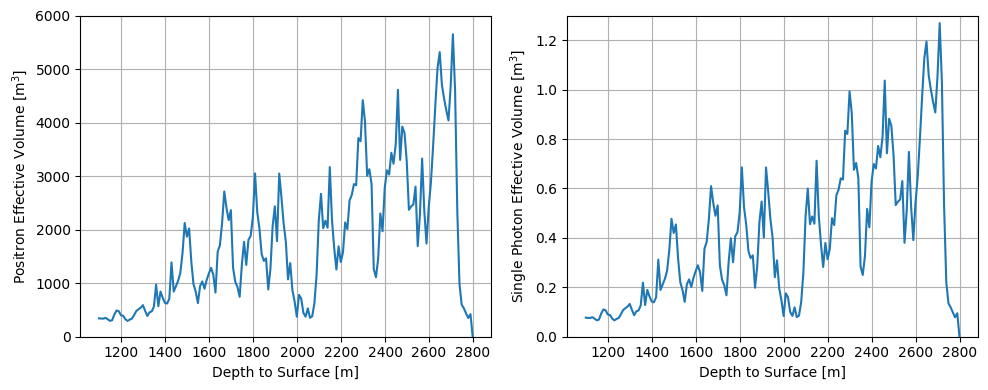

In [59]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
ax[0].plot(depth,effvol_positron)
ax[0].set_xlabel('Depth to Surface [m]')
ax[0].set_xticks([1200,1400,1600,1800,2000,2200,2400,2600,2800])
ax[0].set_ylabel(r'Positron Effective Volume [m$^3$]')
#ax[0].set_xlim((1400,2500))
ax[0].set_ylim((0,6000))
ax[0].grid()
ax[1].plot(depth,effvol_photon)
ax[1].set_xlabel('Depth to Surface [m]')
ax[1].set_xticks([1200,1400,1600,1800,2000,2200,2400,2600,2800])
ax[1].set_ylabel(r'Single Photon Effective Volume [m$^3$]')
#ax[1].set_xlim((1400,2500))
ax[1].set_ylim((0,1.3))
ax[1].grid()
plt.tight_layout()

In [55]:
depth = 1948.07-depth
data = np.array([depth, effvol_photon])
np.savetxt("../files/mDOM_eff_vol.txt", data.T, delimiter = " ", newline = "\n", fmt = ["%3.2f","%0.10f"])